In [2]:
# EDA
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')
import string
from spacy.tokens import Doc
nltk.download('averaged_perceptron_tagger')
from nltk import tokenize # fast sentence tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import spacy #natural language processing
import en_core_web_sm

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel("/content/drive/MyDrive/Data Science for PM/Diabetes Continuous Glucose Monitoring – Data Export.xlsx") 
df.shape

(37844, 63)

## EDA

In this section, we conducted analysis for the following steps:
1. Inspect columns
2. Check missing values
3. Summary statistics
4. Check outliers

__1. Columns__
1. We removed columns that only have missing values
2. We removed columns that are not informative (with too many missing values and/or too granular information)

In [4]:
df.columns

Index(['Post ID', 'Sound Bite Text', 'Ratings and Scores', 'Title',
       'Source Type', 'Post Type', 'Is Paid', 'Media Type', 'URL',
       'Media Link', 'Domain', 'Sentiment',
       'Published Date (GMT-04:00) New York', 'Author Gender', 'Author URL',
       'Author Name', 'Author Handle', 'Author ID',
       'Author Location - Country 1', 'Author Location - State/Province 1',
       'Author Location - City 1', 'Author Location - Country 2',
       'Author Location - State/Province 2', 'Author Location - City 2',
       'Author Location - Other', 'Author Reddit Karma',
       'Followers/Daily Unique Visitors/Subscribers', 'Professions',
       'Interests', 'Positive Objects', 'Negative Objects', 'Richness', 'Tags',
       'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle',
       'Total Engagements', 'Post Comments', 'Post Likes', 'Post Shares',
       'Post Views', 'Post Dislikes', 'Reddit Score', 'Product Name',
       'Product Hierarchy', 'Rating', '@Mention Media Tags'

In [5]:
df.head()

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,...,LexisNexis Company - Any,LexisNexis Person - High,LexisNexis Person - Any,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects
0,BRDRDT2-t1_imq98sr,My numbers are great now. Estimated a1c of 7%i...,NaN,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects...,NaN,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,https://scontent-iad3-1.cdninstagram.com/v/t51...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub ...,NaN,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


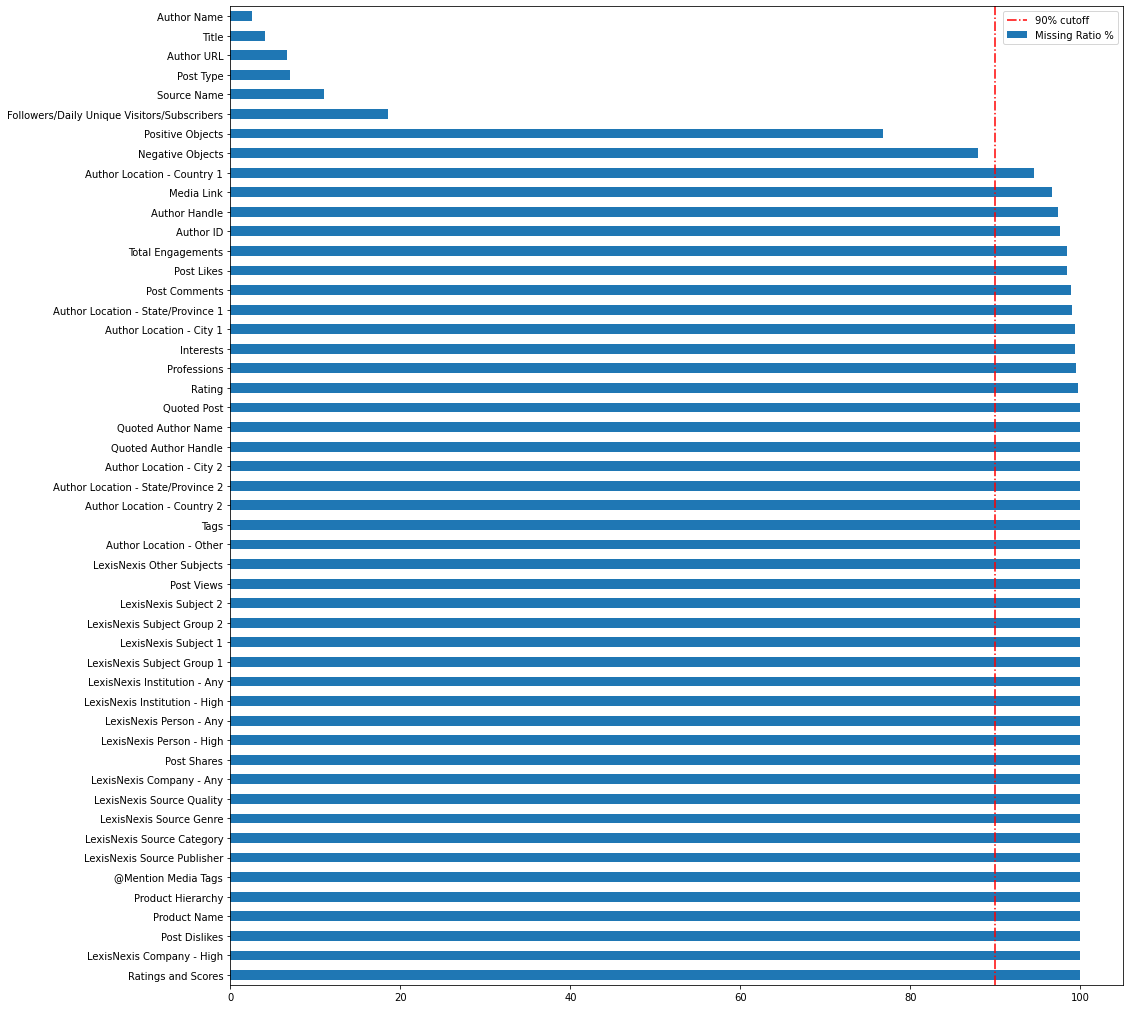

In [ ]:
# Missing value
# Reference: https://stackoverflow.com/questions/69537383/how-to-plot-count-of-null-values-for-each-column-in-pandas-dataframe
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    plot_width, plot_height = (16,18)
    plt.rcParams['figure.figsize'] = (plot_width,plot_height)
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df))*100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.axvline(90, color = 'r', linestyle = '-.', label = '90% cutoff')
        plt.legend()
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

__2. Missing values__

In [6]:
print("The number of columns with only missing value is: ", (df.isna().sum() == len(df)).sum())

The number of columns with only missing value is:  24


In [7]:
df.columns[(df.isna().sum() == len(df))]

Index(['Ratings and Scores', 'Author Location - Other', 'Tags', 'Post Shares',
       'Post Views', 'Post Dislikes', 'Product Name', 'Product Hierarchy',
       '@Mention Media Tags', 'LexisNexis Source Publisher',
       'LexisNexis Source Category', 'LexisNexis Source Genre',
       'LexisNexis Source Quality', 'LexisNexis Company - High',
       'LexisNexis Company - Any', 'LexisNexis Person - High',
       'LexisNexis Person - Any', 'LexisNexis Institution - High',
       'LexisNexis Institution - Any', 'LexisNexis Subject Group 1',
       'LexisNexis Subject 1', 'LexisNexis Subject Group 2',
       'LexisNexis Subject 2', 'LexisNexis Other Subjects'],
      dtype='object')

In [8]:
print("The number of columns with more than 90% values missing is: ", (df.isna().sum() >= 0.9*len(df)).sum() - 24)

The number of columns with more than 90% values missing is:  18


In [9]:
df.columns[(df.isna().sum() < len(df)) & (df.isna().sum() > 0.9*len(df))]

Index(['Media Link', 'Author Handle', 'Author ID',
       'Author Location - Country 1', 'Author Location - State/Province 1',
       'Author Location - City 1', 'Author Location - Country 2',
       'Author Location - State/Province 2', 'Author Location - City 2',
       'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name',
       'Quoted Author Handle', 'Total Engagements', 'Post Comments',
       'Post Likes', 'Rating'],
      dtype='object')

In [6]:
# Removing all columns that are completely blank
df=df.dropna(axis=1, how='all')
df.shape # 63 - 24

(37844, 39)

__3. Summary Statistics__

In [ ]:
# numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Followers/Daily Unique Visitors/Subscribers,30820.0,433775.763400,3.093652e+06,1.0,21671.5,38617.0,78519.00,42298115.0
Richness,37844.0,1.903393,1.725630e+00,0.0,0.0,2.0,3.00,15.0
Total Engagements,618.0,55.522654,2.695147e+02,1.0,5.0,12.0,31.00,5782.0
Post Comments,413.0,6.237288,1.696275e+01,1.0,1.0,3.0,6.00,308.0
Post Likes,594.0,53.429293,2.700113e+02,1.0,4.0,11.0,28.75,5720.0
Rating,113.0,2.657522,1.712236e+00,1.0,1.0,2.0,5.00,5.0


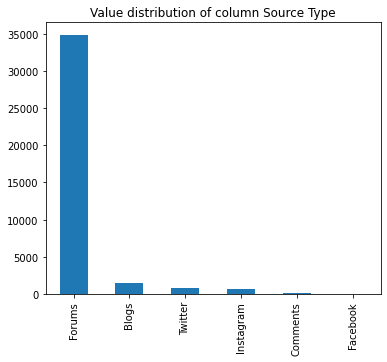

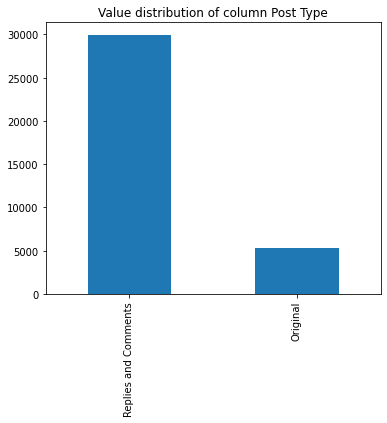

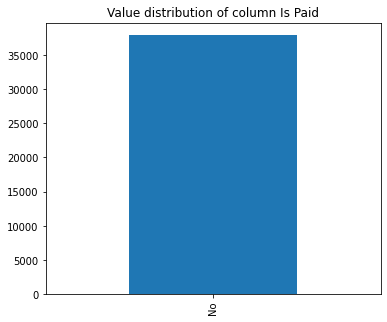

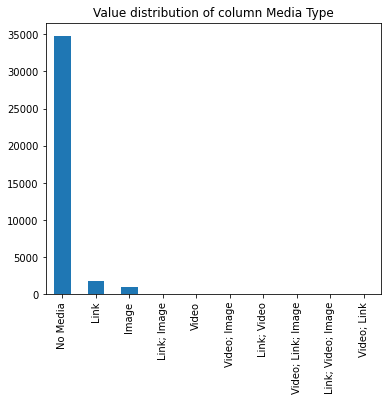

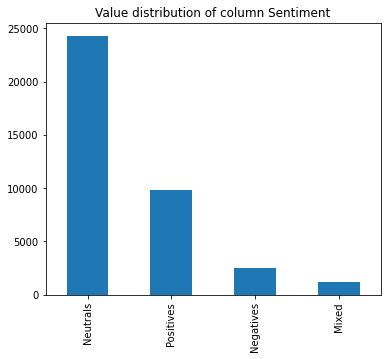

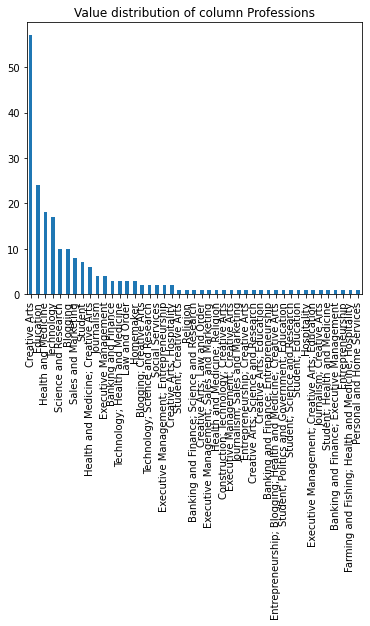

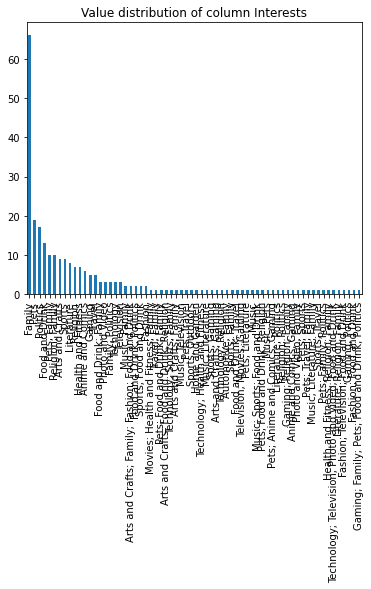

r/diabetes_t1       13284
r/diabetes           9191
r/Type1Diabetes      5887
r/dexcom              663
r/diabetes_t2         487
                    ...  
r/Niacin                1
r/HamptonRoads          1
r/czech                 1
r/MillennialBets        1
r/hyderabad             1
Name: Source Name, Length: 924, dtype: int64
reddit.com                                    33690
twitter.com                                     826
instagram.com                                   630
forum.tudiabetes.org                            209
community.whattoexpect.com                      146
                                              ...  
trentonryflf.canariblogs.com                      1
pebforum.com                                      1
kjlcbd.amoblog.com                                1
hsn.com                                           1
systematicreviewsjournal.biomedcentral.com        1
Name: Domain, Length: 1049, dtype: int64


In [ ]:
# unique values counts
for col in df[['Source Type', 'Post Type',
       'Is Paid', 'Media Type', 'Sentiment','Professions', 'Interests']]:
       plot_width, plot_height = (6,5)
       plt.rcParams['figure.figsize'] = (plot_width,plot_height)
       df[col].value_counts().plot(kind='bar')
       plt.title("Value distribution of column %s" % col)
       plt.show()

for col in df[['Source Name', 'Domain']]:
      print(df[col].value_counts())

__Based on the preliminary insepction, we have the following thoughts.__

Additional columns to drop: 

1) the values are uniform across the dataset and thus the column is not informative (['Is Paid'])

2) the column may not be useful for our analysis due to too many missing values, or due to the nature of the information (['Media Type', 'Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2','Author Location - State/Province 2', 'Author Location - City 2', 'Author URL', 'Author Handle', 'Author Gender';'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'URL', 'Media Link', 'Author ID'])

Observations:

1) None of the posts in this dataset is paid

2) Source type

3) Domain (reddit most)

4) Sentiment

5) Source name (x% has diabetes-related xx)



In [ ]:
# List of the columns to drop
# to_drop = ['Media Type', 'Author Location - Country 1', 'Author Location - State/Province 1','Author Location - City 1', 'Author Location - Country 2',
#            'Author Location - State/Province 2', 'Author Location - City 2', 'Author URL', 'Author Handle', 'Author Gender',
#            'Professions', 'Interests', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle', 'URL', 'Media Link', 'Author ID']

In [ ]:
# Drop the columns specified
# df = df.drop(to_drop, axis = 1)
# df.columns

__4. Distribution and Outliers__

In [ ]:
# Continuous features
# Function to detect outlier values that are outside given standard deviations
def std_outlier_test(df, threshold=3):
    std = np.std(df)
    mean = np.mean(df)
    lb, ub = (-threshold*std+mean, threshold*std+mean)
    mask = (df<lb) | (df>ub)
    print("The outlier thresholds are: %f, %f" % (lb, ub))
    print("The number of outliers is: %d" % len(df[mask]))
    return lb, ub, mask

# Define function to plot distribution and identify outliers
def plot_outlier_test(df, col, threshold = 5):
    # 3 standard deviations away from mean
    lb, ub, outliers = std_outlier_test(df[col], threshold)
    #lb, ub, outliers = iqr_outlier_test(df, col, 3)

    fig, ax = plt.subplots(1,2, figsize = (10, 4))
    sns.histplot(data = df, x = col, bins = 20, ax = ax[0])
    sns.boxplot(data = df, x = col, ax = ax[1])
    plt.axvline(x = lb, color = 'red', linestyle = '--')
    plt.axvline(x = ub, color = 'red', linestyle = '--')
    plt.title('Distribution of %s' % col)
    plt.show()
    print("\nThe title for the outliers are: ", df[outliers]['Title'])
    print("\nThe text for the outliers are: ", df[outliers]['Sound Bite Text'])
    return outliers

The outlier thresholds are: -18127833.879011, 18995385.405812
The number of outliers is: 296


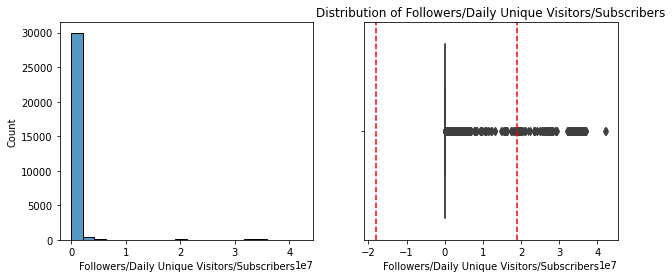


The title for the outliers are:  8        How do Americans manage to pay for their medic...
229      Researchers at Yale have developed a new oral ...
263      What do you fear people will discover after yo...
560       What can kill you but you are doing it everyday?
661      What is the most disturbing fact about the hum...
                               ...                        
37217    What is far deadlier than most people realize?...
37266        What should be atleast 5x cheaper than it is?
37392        No cellphones allowed at Jack White's concert
37432    TIL that Ketogenic diets are a viable treatmen...
37662    What is a medical condition that is a lot more...
Name: Title, Length: 296, dtype: object

The text for the outliers are:  8        It depends on what insurance I have at that ti...
229      Their children who are doctors now! Not everyt...
263      There won’t be a cure, the treatments getting ...
560      Being a diabetic in the US is ridiculous. I ha...
661     

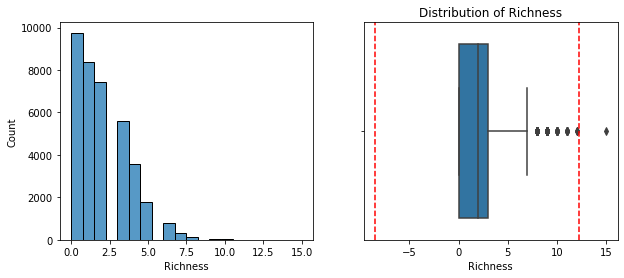


The title for the outliers are:  14300    OMNIPOD 5 REVIEW
Name: Title, dtype: object

The text for the outliers are:  14300    Well to start I like I said it's all opinion I...
Name: Sound Bite Text, dtype: object
The outlier thresholds are: -1560.256713, 1671.302021
The number of outliers is: 2


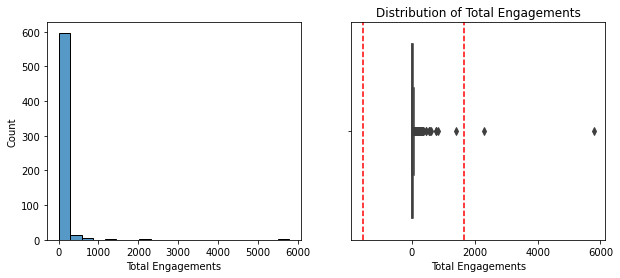


The title for the outliers are:  6522    NaN
8548    NaN
Name: Title, dtype: object

The text for the outliers are:  6522    The Future of Fitness is here. And we call it ...
8548    Nothing compares to a pump. I’ve been doing a ...
Name: Sound Bite Text, dtype: object
The outlier thresholds are: -95.415909, 107.890485
The number of outliers is: 1


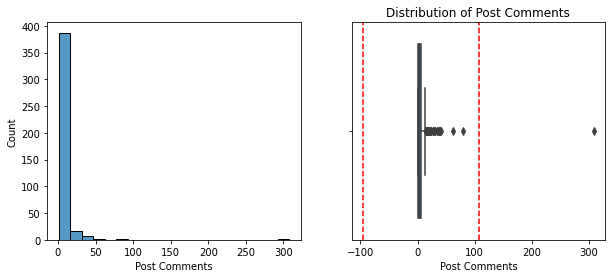


The title for the outliers are:  35548    NaN
Name: Title, dtype: object

The text for the outliers are:  35548    1 guess per person! Can’t wait to hear what yo...
Name: Sound Bite Text, dtype: object
The outlier thresholds are: -1565.274445, 1672.133030
The number of outliers is: 2


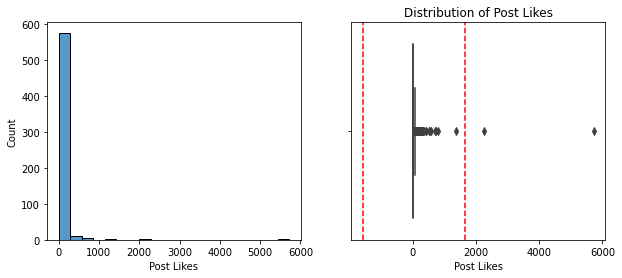


The title for the outliers are:  6522    NaN
8548    NaN
Name: Title, dtype: object

The text for the outliers are:  6522    The Future of Fitness is here. And we call it ...
8548    Nothing compares to a pump. I’ve been doing a ...
Name: Sound Bite Text, dtype: object
The outlier thresholds are: -7.570333, 12.885377
The number of outliers is: 0


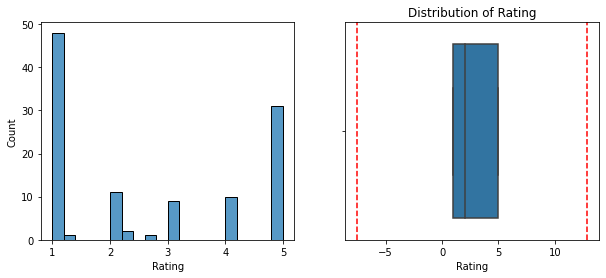


The title for the outliers are:  Series([], Name: Title, dtype: object)

The text for the outliers are:  Series([], Name: Sound Bite Text, dtype: object)


In [ ]:
outliers = []
for col in ['Followers/Daily Unique Visitors/Subscribers', 'Richness',
       'Total Engagements', 'Post Comments', 'Post Likes', 'Rating']:
    outliers.append(plot_outlier_test(df, col, 6))

In [ ]:
df['Sentiment'].value_counts().index

Index(['Neutrals', 'Positives', 'Negatives', 'Mixed'], dtype='object')

In [ ]:
# Categorical features

# Define function to print value counts and count plot
def plot_categories(df, col, plot = True):
    counts = pd.DataFrame(df[col].value_counts())
    percentages = pd.DataFrame(df[col].value_counts(normalize=True))
    print(pd.merge(counts, percentages, on = counts.index, how='outer', suffixes=('_count', '_percentage')))

    if plot:
      ax = sns.countplot(x=df[col], order = df[col].value_counts().index)

      # Add percentage as data labels
      for p, label in zip(ax.patches, round(df[col].value_counts(normalize=True), 2)):
          ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
      plt.title('Distribution of %s' % col)
      plt.show()
    return

       key_0  Source Type_count  Source Type_percentage
0     Forums              34795                0.919432
1      Blogs               1489                0.039346
2    Twitter                826                0.021826
3  Instagram                630                0.016647
4   Comments                 85                0.002246
5   Facebook                 19                0.000502


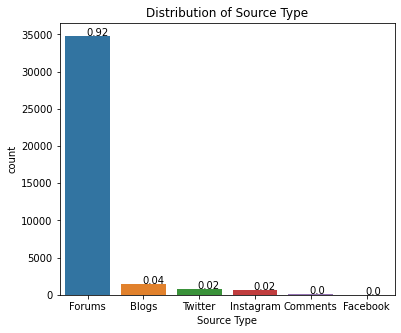

                  key_0  Post Type_count  Post Type_percentage
0  Replies and Comments            29892               0.85005
1              Original             5273               0.14995


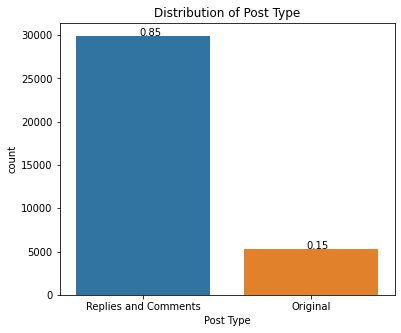

  key_0  Is Paid_count  Is Paid_percentage
0    No          37844                 1.0


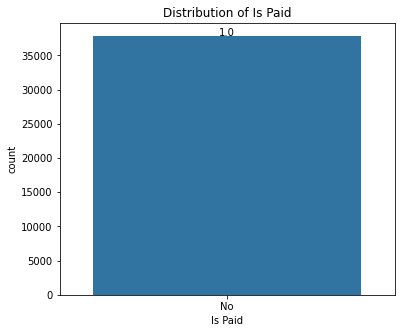

       key_0  Sentiment_count  Sentiment_percentage
0   Neutrals            24306              0.642268
1  Positives             9800              0.258958
2  Negatives             2515              0.066457
3      Mixed             1223              0.032317


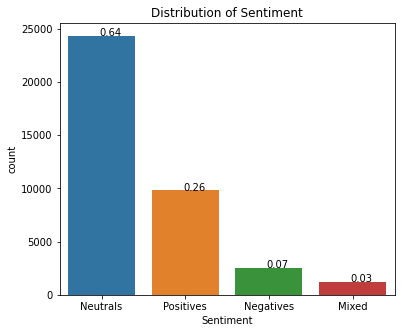

                key_0  Source Name_count  Source Name_percentage
0       r/diabetes_t1              13284                0.394301
1          r/diabetes               9191                0.272811
2     r/Type1Diabetes               5887                0.174740
3            r/dexcom                663                0.019679
4       r/diabetes_t2                487                0.014455
..                ...                ...                     ...
919          r/Niacin                  1                0.000030
920    r/HamptonRoads                  1                0.000030
921           r/czech                  1                0.000030
922  r/MillennialBets                  1                0.000030
923       r/hyderabad                  1                0.000030

[924 rows x 3 columns]
                                           key_0  Domain_count  \
0                                     reddit.com         33690   
1                                    twitter.com           826  

In [ ]:
for col in ['Source Type', 'Post Type', 'Is Paid', 'Sentiment', 'Source Name', 'Domain']:
    if col in ['Source Name', 'Domain']:
      plot_categories(df, col, False)
    else:
      plot_categories(df, col)

In [7]:
pd.to_datetime(df['Published Date (GMT-04:00) New York'])

0       2022-09-01 19:41:36
1       2022-09-01 15:53:47
2       2022-09-02 12:29:44
3       2022-09-01 14:20:21
4       2022-09-01 19:35:52
                ...        
37839   2022-09-01 13:00:50
37840   2022-09-01 06:07:02
37841   2022-09-01 12:14:34
37842   2022-08-31 13:43:59
37843   2022-09-01 12:43:40
Name: Published Date (GMT-04:00) New York, Length: 37844, dtype: datetime64[ns]

In [13]:
# Date features

# Define function to plot count by distribution
def plot_dates(df, col, title):
  df[col] = pd.to_datetime(df[col])
  df['Month'] = df[col].map(lambda dt: dt.strftime('%Y-%m'))
  grouped_df = df.groupby('Month').size().to_frame("count").reset_index()
  grouped_df.plot(kind='bar', x='Month', y='count')
  plt.title(title)
  plt.show()

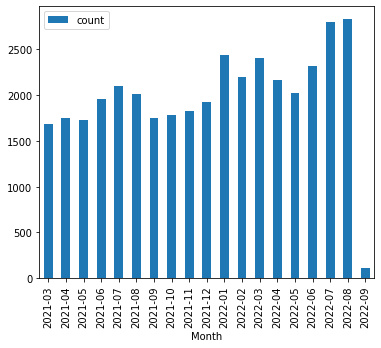

In [ ]:
plot_dates(df, 'Published Date (GMT-04:00) New York')

## Consumer Analysis

1. Who is talking from the data?

2. Information about the authors?

3. Can you identify different types (segments) of consumers or create segments?

4. Are different benefits more important to different consumer types? 

In [ ]:
author_columns = ['Post ID', 'Sound Bite Text', 'Title', 'Source Type', 'Post Type', 
                  'Media Type', 'Media Link', 'Domain', 'Sentiment', 'Author Gender', 'Author URL',
                  'Author Name', 'Author Handle', 'Author ID',
                  'Author Location - Country 1', 'Author Location - State/Province 1',
                  'Author Location - City 1', 'Author Location - Country 2',
                  'Author Location - State/Province 2', 'Author Location - City 2',
                  'Author Reddit Karma', 'Followers/Daily Unique Visitors/Subscribers',
                  'Professions', 'Interests', 'Positive Objects', 'Negative Objects',
                  'Richness', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle',
                  'Total Engagements', 'Post Comments', 'Post Likes',
                  'Reddit Score', 'Source Name', 'Month']
authors = df[author_columns]
authors.columns

Index(['Post ID', 'Sound Bite Text', 'Title', 'Source Type', 'Post Type',
       'Media Type', 'Media Link', 'Domain', 'Sentiment', 'Author Gender',
       'Author URL', 'Author Name', 'Author Handle', 'Author ID',
       'Author Location - Country 1', 'Author Location - State/Province 1',
       'Author Location - City 1', 'Author Location - Country 2',
       'Author Location - State/Province 2', 'Author Location - City 2',
       'Author Reddit Karma', 'Followers/Daily Unique Visitors/Subscribers',
       'Professions', 'Interests', 'Positive Objects', 'Negative Objects',
       'Richness', 'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle',
       'Total Engagements', 'Post Comments', 'Post Likes', 'Reddit Score',
       'Source Name', 'Month'],
      dtype='object')

In [ ]:
authors['Media Type'].value_counts()

No Media              34826
Link                   1765
Image                  1065
Link; Image              86
Video                    60
Video; Image             33
Link; Video               6
Video; Link; Image        1
Link; Video; Image        1
Video; Link               1
Name: Media Type, dtype: int64

In [ ]:
authors.loc[:, 'Has Media'] = authors['Media Type'].apply(lambda s: 'No Media' not in s)
authors.loc[:, 'Has Link'] = authors['Media Type'].apply(lambda s: 'Link' in s)
authors.loc[:, 'Has Image'] = authors['Media Type'].apply(lambda s: 'Image' in s)
authors.loc[:, 'Has Video'] = authors['Media Type'].apply(lambda s: 'Video' in s)

In [ ]:
authors['Source Type'].unique()

array(['Forums', 'Twitter', 'Instagram', 'Blogs', 'Comments', 'Facebook'],
      dtype=object)

In [ ]:
# Filter by source
forums = authors[authors['Source Type'] == 'Forums']
twtter = authors[authors['Source Type'] == 'Twitter']
ig = authors[authors['Source Type'] == 'Instagram']
blogs = authors[authors['Source Type'] == 'Blogs']
comments = authors[authors['Source Type'] == 'Comments']
fb = authors[authors['Source Type'] == 'Facebook']

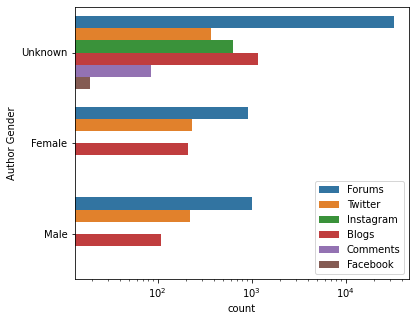

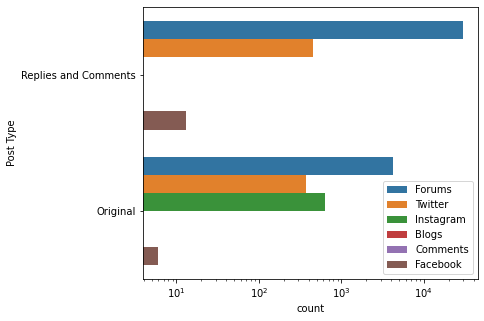

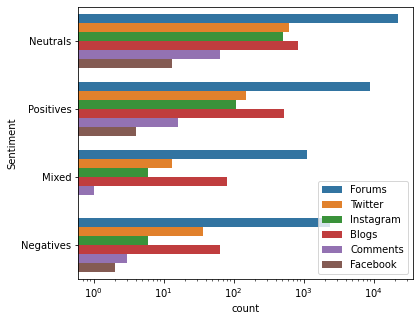

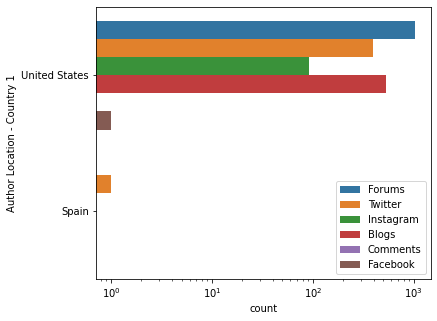

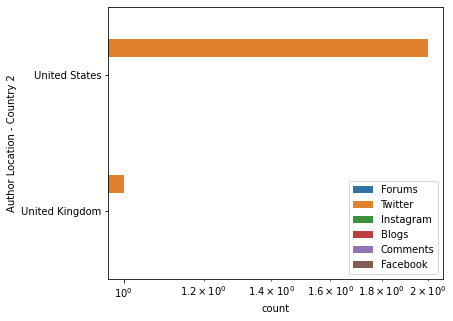

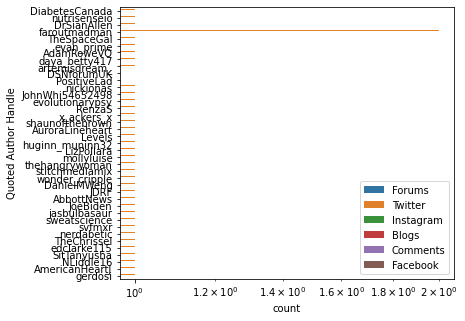

In [ ]:
for col in ['Author Gender', 'Post Type', 'Sentiment', 'Author Location - Country 1',
            'Author Location - Country 2', 'Author Handle', 'Quoted Author Handle']:
  if col not in ['Author Handle', 'Quoted Author Handle']:
    ax = sns.countplot(data = authors, y = col, hue = 'Source Type')
    ax.set_xscale('log')
    plt.legend(loc = 'lower right')
    plt.show()
  else:

In [8]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

nlp = en_core_web_sm.load()
posts = df['Sound Bite Text'].to_numpy()

items_list = []
for post in posts:
  curr_post = nlp(post)
  for x in curr_post.ents:
    if len(x.text) < 2:
      continue
    else:
      items_list.append(x.text.lower())

In [9]:
Counter(items_list).most_common(80) # top 3 CGM products discussed: dexcom, freestyle libre, medtronic.

[('dexcom', 15378),
 ('cgm', 14477),
 ('first', 2437),
 ('one', 1987),
 ('medtronic', 1918),
 ('tandem', 1734),
 ('two', 1191),
 ('dexcom g6', 1155),
 ('freestyle libre', 833),
 ('today', 755),
 ('g6', 665),
 ('us', 641),
 ('bg', 592),
 ('t1', 534),
 ('second', 531),
 ('mdi', 519),
 ('the day', 516),
 ('years', 469),
 ('the freestyle libre', 437),
 ('libre', 432),
 ('100%', 430),
 ('night', 429),
 ('670', 384),
 ('fda', 369),
 ('daily', 364),
 ('iphone', 356),
 ('10', 346),
 ('100', 312),
 ('abbott', 309),
 ('three', 286),
 ('yesterday', 277),
 ('endo', 275),
 ('uk', 273),
 ('omnipod', 263),
 ('medicare', 258),
 ('freestyle', 233),
 ('last year', 226),
 ('canada', 225),
 ('30', 223),
 ('14 day', 220),
 ('dme', 220),
 ('20', 218),
 ('10 days', 218),
 ('70', 217),
 ('t2', 209),
 ('200', 208),
 ('the dexcom g6', 205),
 ('50', 204),
 ('half', 203),
 ('every 5 minutes', 202),
 ('android', 196),
 ('15', 194),
 ('third', 193),
 ('apple', 190),
 ('a month', 181),
 ('zero', 180),
 ('14 days', 1

In [17]:
# how much more dexcom is being discussed compare with other brands
percent_dexcom = 17040/len(items_list)
percent_libre = 1885/len(items_list)
percent_med = 1910/len(items_list)
print(percent_dexcom)
print(percent_libre)
print(percent_med)

0.13502698162396887
0.01493696363621956
0.015135066602217168


In [30]:
# Define function to plot % of pos/neg posts over time
import datetime as dt

def plot_percent(df, col, total, title):
  df[col] = pd.to_datetime(df[col])
  df['Month'] = df[col].map(lambda dt: dt.strftime('%Y-%m'))
  month = sorted(df['Month'].unique())

  group_by = df.groupby('Month').size()
  
  percent_list = []
  for num in group_by:
      percent_list.append((num/total)*100)

  plt.plot(month[:-2], percent_list[:-2], color ='maroon',label='%')
  plt.legend()
  plt.title(title)
  plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


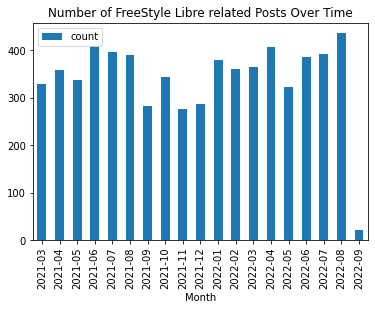

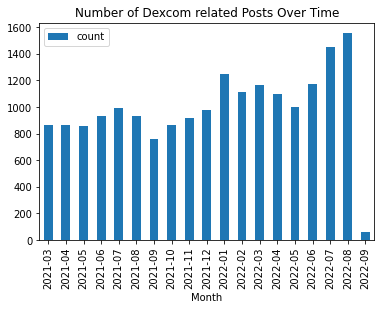

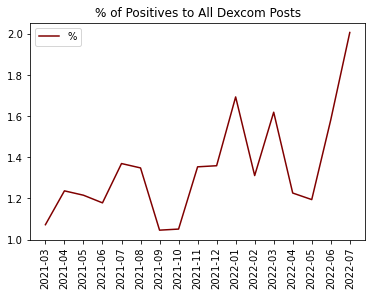

In [31]:
# Popularity trend of each product

# Create sub dataframe for each product
dexcom_df = df[df["Sound Bite Text"].str.contains("dexcom", case=False)]
freestyle_df = df[df["Sound Bite Text"].str.contains("libre", case=False)]
# # Number of posts over time - dexcom is becoming more popular
plot_dates(freestyle_df, 'Published Date (GMT-04:00) New York','Number of FreeStyle Libre related Posts Over Time')
plot_dates(dexcom_df, 'Published Date (GMT-04:00) New York','Number of Dexcom related Posts Over Time')
# Overall sentiment of two products over time - rising opinions from both sides on dexcom, slight decline in positives for libre
dexcom_pos_df = df[(df["Sound Bite Text"].str.contains("dexcom", case=False)) & (df["Sentiment"] == 'Positives') & (~df["Sound Bite Text"].str.contains("libre", case=False))]
freestyle_pos_df = df[(df["Sound Bite Text"].str.contains("libre", case=False)) & (df["Sentiment"] == 'Positives') & (~df["Sound Bite Text"].str.contains("dexcom", case=False))]
dexcom_neg_df = df[(df["Sound Bite Text"].str.contains("dexcom", case=False)) & (df["Sentiment"] == 'Negatives') & (~df["Sound Bite Text"].str.contains("libre", case=False))]
freestyle_neg_df = df[(df["Sound Bite Text"].str.contains("libre", case=False)) & (df["Sentiment"] == 'Negatives') & (~df["Sound Bite Text"].str.contains("dexcom", case=False))]
plot_percent(dexcom_pos_df, 'Published Date (GMT-04:00) New York', len(dexcom_df), '% of Positives to All Dexcom Posts')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


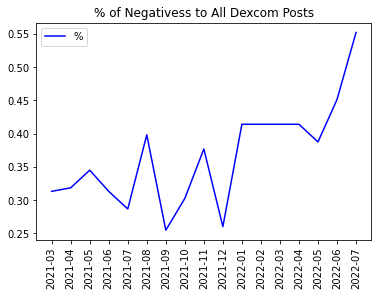

In [19]:
plot_percent(dexcom_neg_df, 'Published Date (GMT-04:00) New York', len(dexcom_df), '% of Negativess to All Dexcom Posts')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


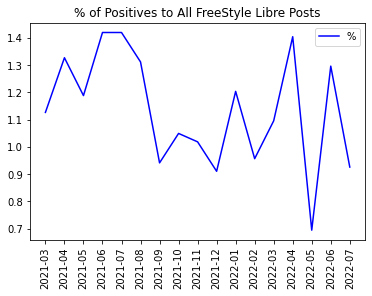

In [20]:
plot_percent(freestyle_pos_df, 'Published Date (GMT-04:00) New York', len(freestyle_df), '% of Positives to All FreeStyle Libre Posts')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


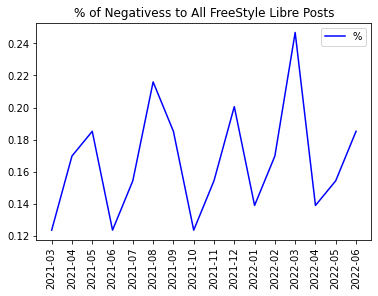

In [21]:
plot_percent(freestyle_neg_df, 'Published Date (GMT-04:00) New York', len(freestyle_df), '% of Negativess to All FreeStyle Libre Posts')

In [83]:
# plot variable (post likes, etc) over time
def plot_var_overtime(df, col, var):
  pd.to_datetime(df['Published Date (GMT-04:00) New York'])
  df[col] = pd.to_datetime(df[col])
  df['Month'] = df[col].map(lambda dt: dt.strftime('%Y-%m'))
  grouped_df = df.groupby('Month')[var].sum().to_frame("total").reset_index()
  grouped_df.plot(kind='bar', x='Month', y='total')
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


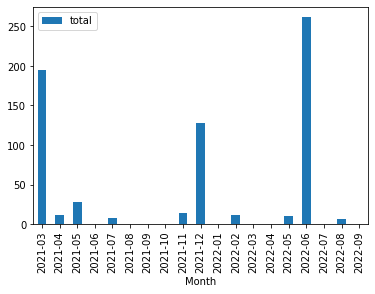

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


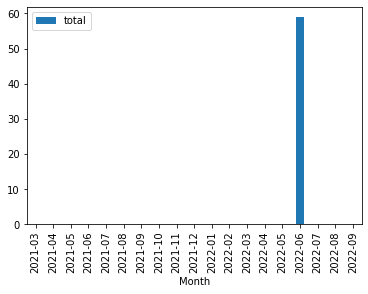

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


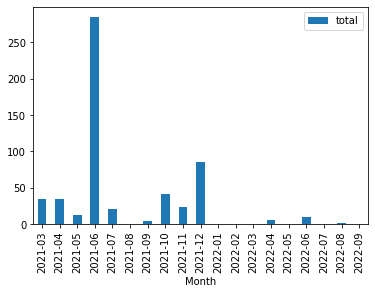

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


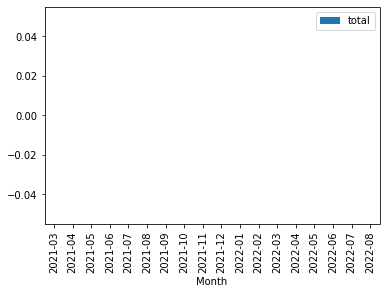

In [84]:
plot_var_overtime(dexcom_pos_df, 'Published Date (GMT-04:00) New York','Post Likes')
plot_var_overtime(dexcom_neg_df, 'Published Date (GMT-04:00) New York','Post Likes')
plot_var_overtime(freestyle_pos_df, 'Published Date (GMT-04:00) New York','Post Likes')
plot_var_overtime(freestyle_neg_df, 'Published Date (GMT-04:00) New York','Post Likes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


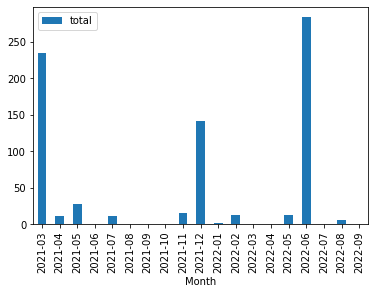

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


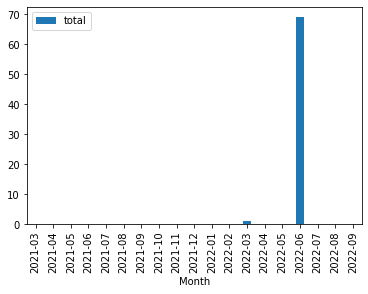

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


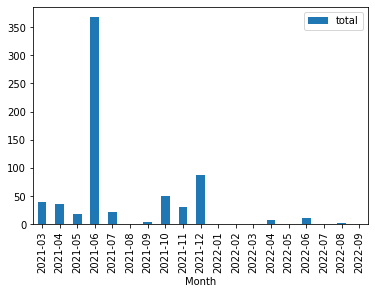

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


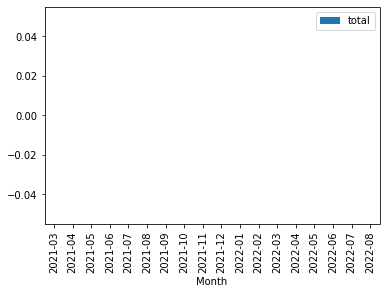

In [85]:
plot_var_overtime(dexcom_pos_df, 'Published Date (GMT-04:00) New York','Total Engagements')
plot_var_overtime(dexcom_neg_df, 'Published Date (GMT-04:00) New York','Total Engagements')
plot_var_overtime(freestyle_pos_df, 'Published Date (GMT-04:00) New York','Total Engagements')
plot_var_overtime(freestyle_neg_df, 'Published Date (GMT-04:00) New York','Total Engagements')

In [79]:
pd.to_datetime(dexcom_pos_df['Published Date (GMT-04:00) New York'])
dexcom_pos_df['Month'] = dexcom_pos_df['Published Date (GMT-04:00) New York'].map(lambda dt: dt.strftime('%Y-%m'))
dexcom_pos_df.groupby('Month')['Post Likes'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Month
2021-03    195.0
2021-04     11.0
2021-05     28.0
2021-06      0.0
2021-07      8.0
2021-08      0.0
2021-09      0.0
2021-10      0.0
2021-11     14.0
2021-12    128.0
2022-01      0.0
2022-02     12.0
2022-03      0.0
2022-04      0.0
2022-05     10.0
2022-06    262.0
2022-07      0.0
2022-08      6.0
2022-09      0.0
Name: Post Likes, dtype: float64

In [67]:
# praises and complaints on CGM

# positive objects
pos_obj = df['Positive Objects'].to_numpy() # extract texts into an array
pos_obj = pos_obj[np.logical_not(pd.isnull(pos_obj))]
# negative objects
neg_obj = df['Negative Objects'].to_numpy()
neg_obj = neg_obj[np.logical_not(pd.isnull(neg_obj))]
# count top words in different categories
all_pos_counter = Counter()
adj_pos_counter = Counter()
noun_pos_counter = Counter()
verb_pos_counter = Counter()

all_neg_counter = Counter()
adj_neg_counter = Counter()
noun_neg_counter = Counter()
verb_neg_counter = Counter()

pos_useful_words = []
pos_adjs = []
pos_nouns = []
pos_verbs = []

neg_useful_words = []
neg_adjs = []
neg_nouns = []
neg_verbs = []

remove_words = []

# loop over each tweet
for tw in pos_obj:

    # Convert tw into Doc object with a sequence of "twitter token"
    for token in nlp(tw):
        if token.text in nlp.Defaults.stop_words or 'http' in token.text or 'google' in token.text or token.text in string.punctuation or 'car' in token.text or len(token.text) < 2 or token.text in remove_words: # remove stop words
            continue
        else:
            pos_useful_words.append(token.text)
        if token.pos_ == 'ADJ':
            pos_adjs.append(token.text)
        elif token.pos_ == 'NOUN':
            pos_nouns.append(token.text)
        elif token.pos_ == 'VERB':
            pos_verbs.append(token.text)

all_pos_counter.update(pos_useful_words)
adj_pos_counter.update(pos_adjs)
noun_pos_counter.update(pos_nouns)
verb_pos_counter.update(pos_verbs)

# loop over each tweet
for tw in neg_obj:

    # Convert tw into Doc object with a sequence of "twitter token"
    for token in nlp(tw):
        if token.text in nlp.Defaults.stop_words or 'http' in token.text or 'google' in token.text or token.text in string.punctuation or 'car' in token.text or len(token.text) < 2 or token.text in remove_words: # remove stop words
            continue
        else:
            neg_useful_words.append(token.text)
        if token.pos_ == 'ADJ':
            neg_adjs.append(token.text)
        elif token.pos_ == 'NOUN':
            neg_nouns.append(token.text)
        elif token.pos_ == 'VERB':
            neg_verbs.append(token.text)

all_neg_counter.update(neg_useful_words)
adj_neg_counter.update(neg_adjs)
noun_neg_counter.update(neg_nouns)
verb_neg_counter.update(neg_verbs)



In [68]:
print('For positive objects:')
print('Overall Top 10:\n')
print(all_pos_counter.most_common(10))
print('-----------------------------------\n')
print('Adjectives Top 10:\n')
print(adj_pos_counter.most_common(10))
print('-----------------------------------\n')
print('Nouns Top 10:\n')
print(noun_pos_counter.most_common(10))
print('-----------------------------------\n')
print('Verbs Top 10:\n')
print(verb_pos_counter.most_common(10))
print('\n')

print('For negative objects:')
print('Overall Top 10:\n')
print(all_neg_counter.most_common(10))
print('-----------------------------------\n')
print('Adjectives Top 10:\n')
print(adj_neg_counter.most_common(10))
print('-----------------------------------\n')
print('Nouns Top 10:\n')
print(noun_neg_counter.most_common(10))
print('-----------------------------------\n')
print('Verbs Top 10:\n')
print(verb_neg_counter.most_common(10))

For positive objects:
Overall Top 10:

[('Dexcom', 1023), ('CGM', 633), ('dexcom', 561), ('Libre', 452), ('pump', 363), ('G6', 325), ('sensor', 255), ('Freestyle', 236), ('libre', 229), ('glucose', 225)]
-----------------------------------

Adjectives Top 10:

[('good', 187), ('continuous', 155), ('great', 106), ('new', 89), ('g6', 76), ('Medtronic', 69), ('better', 54), ('best', 48), ('omnipod', 38), ('free', 36)]
-----------------------------------

Nouns Top 10:

[('sensor', 250), ('glucose', 215), ('pump', 201), ('insulin', 147), ('monitor', 144), ('sugar', 93), ('blood', 90), ('insurance', 88), ('system', 81), ('pen', 64)]
-----------------------------------

Verbs Top 10:

[('pump', 160), ('tandem', 42), ('Omnipod', 30), ('reply', 28), ('omnipod', 22), ('watch', 22), ('arm', 17), ('patch', 17), ('help', 17), ('diabetes', 16)]


For negative objects:
Overall Top 10:

[('Dexcom', 252), ('sensor', 230), ('dexcom', 177), ('CGM', 163), ('pump', 155), ('Libre', 102), ('Medtronic', 100)